# *Absorbing Markov Chain*

### A state $s_{i}$ is an *absorbing state* if $p_{ii}=1$ i.e. it is impossible to go from $s_{i}$ to any other state

### A Markov chain is absorbing if:

#### 1. It has some state $s_{i}$ that is an absorbing state

#### 2. It is possible to transition to the absorbing state from every other state in the process

_____

# *Transient State*

### A transient state in a absorbing Markov chain is any state that isn't absorbing

____


# *Drunkard's Walk*

### A man walks along a four block stretch of Park Avenue

### If he is at corner 1, 2, or 3, he walks to the left or right with equal probability

### He continues until he reaches corner 4, which is a bar, or corner 0, which is his home. If he reaches either, he stays there

### We can create the following Markov chain representation of his walk

![](images/ex-11-13.PNG)

### So, from our definitions, states 0 and 4 are absorbing states and states 1, 2, and 3 are transient

### This is an absorbing Markov chain

### When we reach an absorbing state, we say that the process is absorbed

## Questions we can ask

### 1. What is the probability that a process will end up being absorbed?

### 2. What is the probability that the process will end up being absorbed by a given absorbing state?

### 3. How long can we expect it to take for a process to be absorbed?

### 4. How much time can we expect a process to spend in a given transient state?


### The answers to these questions depend on a) what state we start, and b) the transition probabilities

### Let's calculate the probabilities

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 10

In [5]:
df = pd.DataFrame(index = range(5), columns = range(5))
df.loc[0] = [1, 0, 0, 0, 0]
df.loc[1] = [0.5,0,0.5,0,0]
df.loc[2] = [0, 0.5, 0, 0.5, 0]
df.loc[3] = [0, 0, 0.5, 0, 0.5]
df.loc[4] = [0, 0, 0, 0, 1]
df

,0,1,2,3,4
0,1,0,0,0,0
1,0.5,0,0.5,0,0
2,0,0.5,0,0.5,0
3,0,0,0.5,0,0.5
4,0,0,0,0,1


In [13]:
P = df.as_matrix()

for n in range(1,6):
    n = n*10
    Pn = np.linalg.matrix_power(P, n)
    df_P = pd.DataFrame(Pn)
    print('\nn = {}'.format(n))
    print(df_P)


n = 10
          0         1        2         3         4
0         1         0        0         0         0
1  0.734375  0.015625        0  0.015625  0.234375
2  0.484375         0  0.03125         0  0.484375
3  0.234375  0.015625        0  0.015625  0.734375
4         0         0        0         0         1

n = 20
           0             1             2             3          4
0          1             0             0             0          0
1  0.7495117  0.0004882812             0  0.0004882812  0.2495117
2  0.4995117             0  0.0009765625             0  0.4995117
3  0.2495117  0.0004882812             0  0.0004882812  0.7495117
4          0             0             0             0          1

n = 30
           0             1             2             3          4
0          1             0             0             0          0
1  0.7499847  1.525879e-05             0  1.525879e-05  0.2499847
2  0.4999847             0  3.051758e-05             0  0.4999847
3  0.24998

### It looks like as we increase the number of steps, the probabilities converge to an interpolated value between the absorbing states

### i.e. $P(\text{Finish at 4} | \text{Started at 1}) = 0.25$

### Let's simulate a bunch of walks

In [43]:
df = pd.DataFrame()
for i in range(100):
    x = []
    state = np.random.choice([0,1,2,3,4])
    x.append(state)
    while 0 < state < 4:
        state += np.random.choice([-1, 1])
        x.append(state)
    df = pd.concat([df, pd.DataFrame(x)], axis = 1, ignore_index = True)

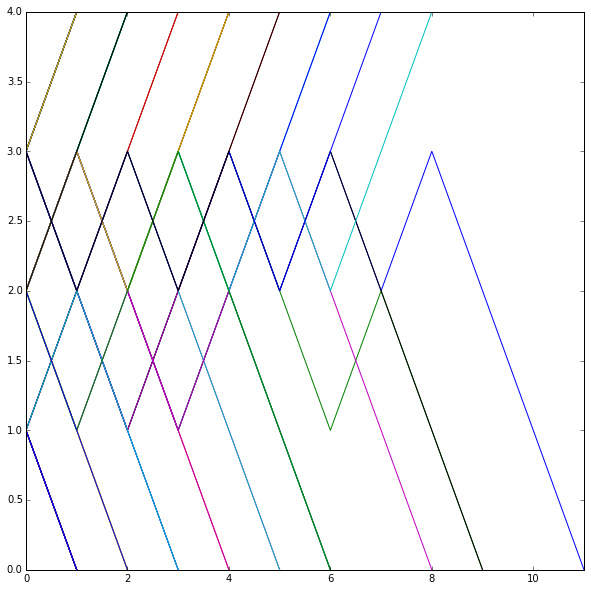

In [51]:
df.plot(legend = False)

In [54]:
df.count().describe()

count    100.000000
mean       3.000000
std        2.510584
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       12.000000
dtype: float64

_____

# *Canonical Form*

### Take an arbitrary Markov chain

### Reindex the states so we have all transient states first, then all absorbing states after

### If we have $r$ absorbing states and $t$ transient states, then the transition matrix has the following canonical form

![](images/canonical-form-1.PNG)

### $Q$ is a $t$x$t$ matrix

### $R$ is a $t$x$r$ matrix

### $I$ is an $r$x$r$ identity matrix

### $0$ is an $r$x$t$ matrix of 0s

### Now, we express $P^{n}$ as:

![](images/canonical-form-2.PNG)

### $*$ is a $t$x$r$ matrix derived from $Q$ and $R$

### We can see that the probailities for being in each transient state after $n$ steps are defined by $Q^{n}$

______

# *Probability of Absorption*

# Theorem 11.3

### In an absorbing Markov chain, the proability that the process will be absorbed is 1

### i.e. $Q^{n}\rightarrow 0$ as $n\rightarrow \infty$

____

# *The Fundamental Matrix*

# Theorem 11.4

### For an absorbing Markov chain the matrix $I-Q$ has an inverse matrix $N$ and $N = I + Q + Q^{2} + ...$

### The $ij$th entry $n_{ij}$ for the matrix $N$ is the expected number of times the chain is in state $s_{j}$ given that it starts in state $s_{i}$

#### Note: we count it if the process starts in state $s_{i}$

## This matrix $N$ is called the *fundamental matrix* of $P$

____

## Example

### We can reshape the matrix for the drunkard's walk to be the following:

![](images/canonical-form-3.PNG)

### This means the matrix $Q$ is:

# $Q = \begin{pmatrix}0 & 1/2 & 0\\ 1/2 & 0 & 1/2\\ 0 & 1/2 & 0\end{pmatrix} \implies I - Q = \begin{pmatrix}1 & -1/2 & 0\\ -1/2 & 1 & -1/2\\ 0 & -1/2 & 1\end{pmatrix}$

# $\implies N = (I-Q)^{-1} = \begin{pmatrix}3/2 & 1 & 1/2\\ 1 & 2 & 1\\ 1/2 & 1 & 3/2\end{pmatrix}$

_____

# *Time to Absorption*

### Now, we ask how long it'll take before the process is absorbed

# Theorem 11.5

### Let $t_{i}$ be the expected number of steps until a process is absorved given that it starts in state $s_{i}$

### From this, we form a vector $t$ such that $t = \begin{bmatrix}t_{1}\\ t_{2}\\ ...\\ t_{t}\end{bmatrix}$

## Then $t = Nc$ where $c=\begin{bmatrix}1\\ 1\\ ...\\ 1\end{bmatrix}$

____

# *Absorption Probabilities*

# Theorem 11.6

### Let $b_{ij}$ be the probability that an absorbing chain gets absorbed by state $s_{j}$ given that it started in state $s_{i}$

### Let $B$ be the matrix $B = \begin{pmatrix}b_{11} & b_{12} & ... & b_{1r}\\ b_{21} & b_{21} & ... & b_{2r}\\  & ... &  & \\ b_{t1} & b_{t1} & ... & b_{tr}\end{pmatrix}$

## Then $B = NR$ where $N$ is the fundamental matrix and $R$ is the top right of the canonical form matrix

____

## Example

### In the drunkard's walk, we found that:

# $N = \begin{pmatrix}3/2 & 1 & 1/2\\ 1 & 2 & 1\\ 1/2 & 1 & 3/2\end{pmatrix}$

# $R = \begin{pmatrix}1/2 & 0\\ 0 & 0\\0 & 1/2\end{pmatrix}$

# $\implies t = Nc = \begin{pmatrix}3/2 & 1 & 1/2\\ 1 & 2 & 1\\ 1/2 & 1 & 3/2\end{pmatrix}\begin{bmatrix}1\\ 1\\ 1\end{bmatrix} = \begin{bmatrix}3\\ 4\\ 3\end{bmatrix}$

# $\implies B = NR = \begin{pmatrix}3/2 & 1 & 1/2\\ 1 & 2 & 1\\ 1/2 & 1 & 3/2\end{pmatrix}\begin{pmatrix}1/2 & 0\\ 0 & 0\\0 & 1/2\end{pmatrix} = \begin{pmatrix}3/4 & 1/4\\ 1/2 & 1/2\\1/4 & 3/4\end{pmatrix}$